In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from pandas import DataFrame
import sklearn
from pandas import DataFrame
import scikitplot as skplt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
svm=LinearSVC()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()
gnb=GaussianNB()

In [2]:
import matplotlib as mt
axes= {"linewidth" : 3}
mt.rc("axes", **axes)
font={"weight": 'bold', "family": "Times new roman", "size": 12}
mt.rc("font", **font)

In [3]:
dataset=pd.read_excel("Combined data.xlsx")
dataset

,ΔX mulliken,rA/rC,ΔX Pauling,Delta,ΔH mixing,ΔS mixing,AIC,ΔP-rad,Phase formation
0,2.629500,0.437500,0.9280,0.063086,1.12,13.38,18.186440,2.01000,Single phase
1,2.624000,0.437500,0.9220,0.063086,-0.16,13.38,18.038570,1.99300,Single phase
2,2.543300,0.482759,0.9640,0.026537,-3.84,13.38,18.688520,1.96000,Single phase
3,2.533000,0.451613,1.0120,0.046064,-3.52,13.38,19.836200,2.02600,Single phase
4,2.629800,0.451613,1.0040,0.047429,-3.84,13.38,19.650520,1.98400,Single phase
...,...,...,...,...,...,...,...,...,...
287,2.099125,0.378378,0.7175,0.153609,-42.75,11.52,13.939362,2.02875,Multi phase
288,2.321625,0.500000,0.6550,0.030428,-22.25,11.52,12.309975,1.78625,Multi phase
289,2.414375,0.500000,0.6900,0.015890,-3.50,11.52,13.056875,1.87625,Multi phase
290,2.279875,0.482759,0.4825,0.040656,-6.00,11.52,8.866862,1.93000,Multi phase


In [4]:
x=dataset[["ΔX mulliken", 'rA/rC', 'ΔX Pauling', 'Delta', 'ΔH mixing', 'ΔS mixing']]
y=dataset[["Phase formation"]]
y

,Phase formation
0,Single phase
1,Single phase
2,Single phase
3,Single phase
4,Single phase
...,...
287,Multi phase
288,Multi phase
289,Multi phase
290,Multi phase


In [5]:
x_train, x_test1,  y_train1, y_test1=train_test_split(x, y, test_size=0.25, random_state=25)

In [6]:
cv_method=sklearn.model_selection.RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=40)

In [7]:
sc=StandardScaler()
pca=PCA(n_components=3)

In [8]:
x_train1=pd.DataFrame(sc.fit_transform(x_train))
x_train1
x_test1=pd.DataFrame(sc.fit_transform(x_test1))

In [9]:
kn.fit(x_train1, y_train1)
score_knn_train1=kn.score(x_train1, y_train1)
score_knn_train1

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9680365296803652

In [10]:
score_knn_test1=kn.score(x_test1, y_test1)
score_knn_test1

0.9726027397260274

In [11]:
%%time
#KNN
knn_pipe=Pipeline(steps=[('pca', pca),
                        ('kn', kn)])
grid_params={
    'kn__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    'kn__weights':['uniform', 'distance'],
    'kn__metric':['euclidean', 'manhattan']
}
gs=GridSearchCV(knn_pipe, grid_params,  cv = cv_method, verbose = 1, 
                      n_jobs = -1)
gs_results=gs.fit(x_train1, y_train1)
gs_results.best_params_

Fitting 15 folds for each of 44 candidates, totalling 660 fits
Wall time: 8.82 s


C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'kn__metric': 'manhattan', 'kn__n_neighbors': 6, 'kn__weights': 'distance'}

In [12]:
kn_hp=KNeighborsClassifier(n_neighbors=6,metric='euclidean', weights='distance')
kn_hp.fit(x_train1, y_train1)
score_knn_train1=kn_hp.score(x_train1, y_train1)
score_knn_train1

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1.0

In [13]:
score_knn_test1=kn_hp.score(x_test1, y_test1)
score_knn_test1

0.9726027397260274

In [16]:
from sklearn.metrics import accuracy_score
from numpy import mean

In [17]:
def baseline_model(model_name):
    model = model_name
    steps = list()
    steps.append(('sc', sc))
    steps.append(('ml', model))
    pipeline = Pipeline(steps=steps)
    cv = cv_method
    scores = cross_val_score(pipeline, x_train1, y_train1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores=100*scores
    print(model,'Accuracy: %.3f' % (mean(scores)))
    print('Std: %.3f'%  np.std(scores))

In [18]:
%%time
baseline_model(kn)
baseline_model(kn_hp)

KNeighborsClassifier() Accuracy: 94.703
Std: 2.392
KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance') Accuracy: 95.708
Std: 2.114
Wall time: 214 ms


In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [20]:
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.01, 1.0, 50)):
  
    fig,ax = plt.subplots(1, 1, figsize=(7,7))

    plt.xlabel("Training Examples",font='Times New Roman',fontweight='bold',fontsize=25)
    plt.ylabel("Accuracy Score",font='Times New Roman',fontweight='bold',fontsize=25)

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = (np.mean(train_scores, axis=1))*100
    train_scores_std = (np.std(train_scores, axis=1))*100
    test_scores_mean = (np.mean(test_scores, axis=1))*100
    test_scores_std = (np.std(test_scores, axis=1))*100
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    leg=plt.legend(loc='lower right',prop={'size':12})
    leg.get_frame().set_edgecolor('k')
    return plt

In [21]:
X=pd.concat([x_train1,x_test1])
X
Y=pd.concat([y_train1,y_test1])

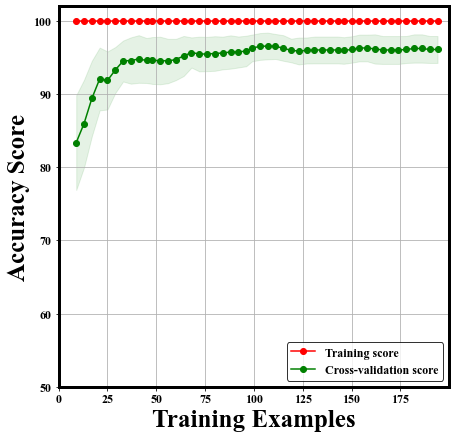

In [26]:
cv = cv_method
plot_learning_curve(kn_hp, X,Y, ylim=(0.1, 1.01), cv=cv, n_jobs=-1)
plt.grid(True)
plt.xlim([0,200])
plt.ylim([50, 102])
plt.xticks(range(0, 200, 25))
plt.savefig('learning curve kNN initial imbalanced.jpg',bbox_inches='tight', dpi=600)

In [27]:
clf = OneVsRestClassifier(kn_hp)
clf.fit(x_train1, y_train1)
predicted_probas = clf.predict_proba(x_test1)

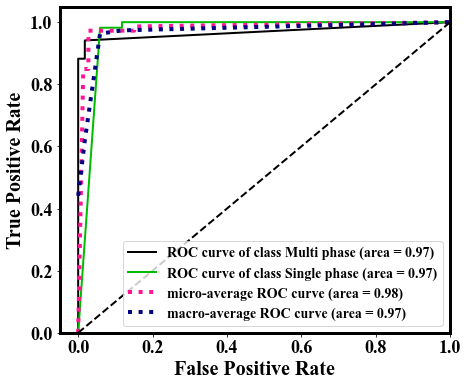

In [28]:
# The magic happens here
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test1, predicted_probas, title=None, text_fontsize=18, figsize=(7,6))
plt.legend(loc="lower right", fontsize= 14)
plt.xlim([-0.05, 1])
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=20)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=20)
plt.savefig('AUC-ROC kNN initial imbalanced.JPG',dpi=600,bbox_inches='tight')

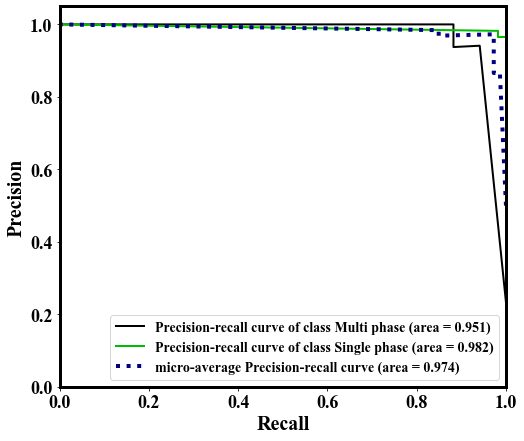

In [29]:
skplt.metrics.plot_precision_recall(y_test1, predicted_probas, title=None, text_fontsize=18, figsize=(8,7))
plt.xlim([0, 1])
plt.xlabel('Recall',fontweight='bold',fontsize=20)
plt.ylabel('Precision',fontweight='bold',fontsize=20)
plt.legend(loc="lower right", fontsize= 14)
plt.savefig('Precision Recall kNN initial imbalanced.JPG',dpi=600,bbox_inches='tight')

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

C:\Users\rmitr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


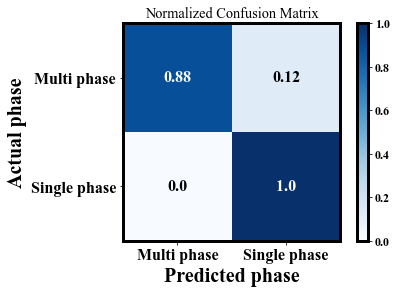

In [31]:
model=kn_hp
model.fit(x_train1, y_train1)
y_pred = model.predict(x_test1)
skplt.metrics.plot_confusion_matrix(y_test1, y_pred, normalize=True, title=None, text_fontsize=16)
plt.xlabel('Predicted phase',fontweight='bold',fontsize=20)
plt.ylabel('Actual phase',fontweight='bold',fontsize=20)
plt.savefig('Confusion matrix kNN initial imbalanced.jpg',bbox_inches='tight', dpi=600)

In [32]:
f1_score(y_test1, y_pred, average='weighted')

0.9719869021869743